In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
from tslearn.datasets import UCR_UEA_datasets
import sklearn
import pickle
import numpy as np 
import torch 
from TSInterpret_Artifacts.ClassificationModels.CNN_T import ResNetBaseline, UCRDataset, fit
import warnings
warnings.filterwarnings("ignore") 

from tslearn.preprocessing import TimeSeriesScalerMinMax
import matplotlib.pyplot as plt

from tslearn.shapelets import LearningShapelets

In [18]:
# Plot single Time Series with Label
def plot_ts(ts_sample):
    ts= ts_sample
    plt.figure(figsize=(10, 4))
    plt.plot(ts, label="Time Series", color='blue')
    plt.title(f"Time Series")
    plt.xlabel("Time Steps")
    plt.ylabel("Value")

    # Display grid and legend
    plt.grid(False)
    # plt.legend()
    plt.show()

In [3]:
dataset='Coffee'
train_x,train_y, test_x, test_y=UCR_UEA_datasets().load_dataset(dataset)


In [30]:
model = LearningShapelets(n_shapelets_per_size={30: 1})
model.fit(train_x, train_y)
train_distances = model.transform(train_x)
test_distances = model.transform(test_x)
shapelets = model.shapelets_

In [ ]:
distances = model.transform(train_x) # Transforms each TS sample into space formed by the distances to each shapelet
predicted_locations = model.locate(train_x)

In [27]:
shap = model.shapelets_[0]
shap = TimeSeriesScalerMinMax().fit_transform(shap.reshape(1, -1, 1)).flatten()

In [26]:
shapelets

array([[[ 0.15008602],
        [ 0.16195408],
        [ 0.15982053],
        [ 0.14624125],
        [ 0.12188563],
        [ 0.07741957],
        [ 0.04581875],
        [ 0.03247845],
        [ 0.02525112],
        [ 0.02422554],
        [ 0.02884237],
        [ 0.04489326],
        [ 0.05467326],
        [ 0.05574494],
        [ 0.06049618],
        [ 0.08976553],
        [ 0.14878972],
        [ 0.18147942],
        [ 0.16930822],
        [ 0.1572037 ],
        [ 0.13948226],
        [ 0.09187395],
        [ 0.04513863],
        [ 0.01138473],
        [-0.00963376],
        [ 0.02223838],
        [ 0.06162363],
        [ 0.07311575],
        [ 0.0346031 ],
        [ 0.00385748]]])

In [28]:
shap

array([0.83573395, 0.89783358, 0.88666979, 0.81561619, 0.68817542,
       0.45550668, 0.29015536, 0.22035221, 0.18253517, 0.17716882,
       0.20132638, 0.28531272, 0.33648658, 0.34209415, 0.366955  ,
       0.52010694, 0.82895107, 1.        , 0.93631413, 0.87297726,
       0.78024978, 0.53113924, 0.2865966 , 0.1099793 , 0.        ,
       0.16677105, 0.37285441, 0.43298693, 0.23146946, 0.07059292])

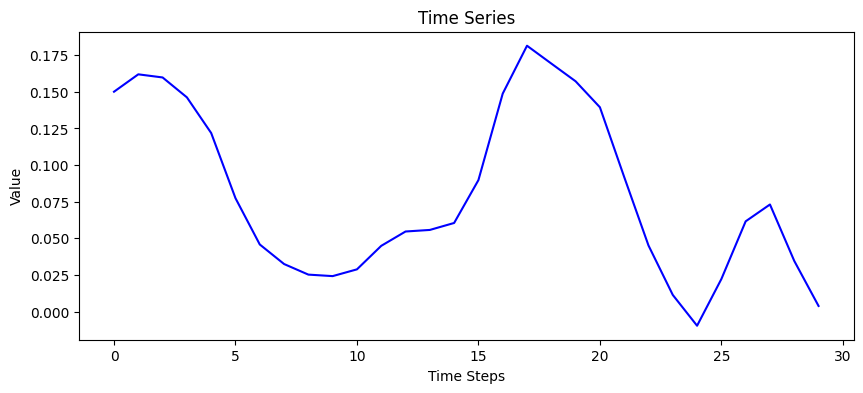

In [22]:
plot_ts(shapelets[0])

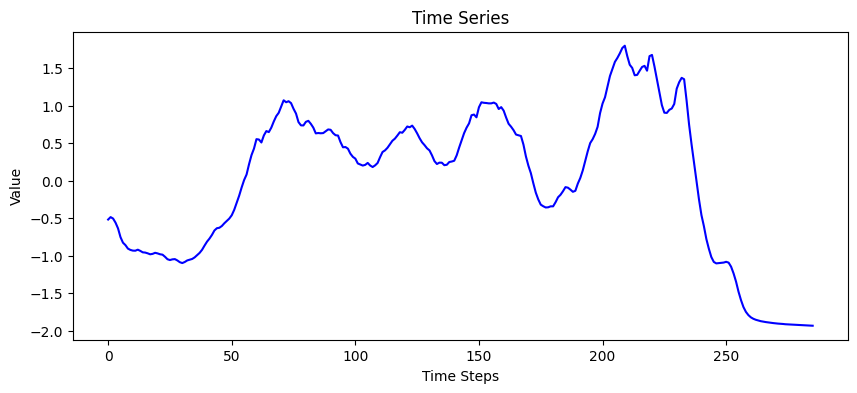

In [19]:
plot_ts(train_x[0])

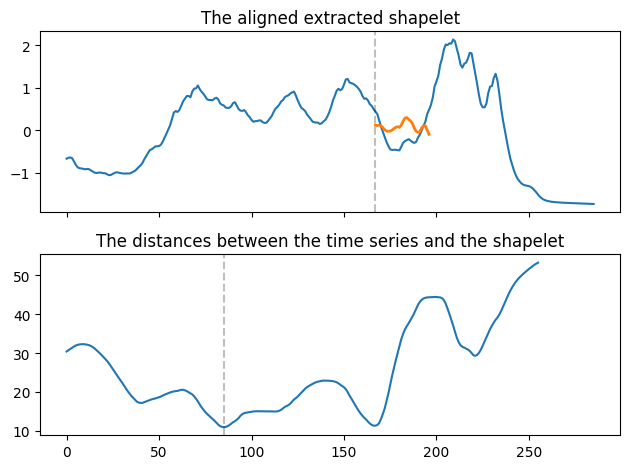

In [50]:
# 0 - 13 Label 0; 14 - 27 Label 1

distances = model.transform(train_x) # Do not use since distances come from blackbox model and are not the same as manually calculated distances
predicted_locations = model.locate(train_x)

f, ax = plt.subplots(2, 1, sharex=True)

# Plot the shapelet and align it on the best matched time series. The optimizer
# will often enlarge the shapelet to create a larger gap between the distances
# of both classes. We therefore normalize the shapelet again before plotting.
test_ts_id = 10 #np.argmin(np.sum(distances, axis=1))
shap = model.shapelets_[0]
#shap = TimeSeriesScalerMinMax().fit_transform(shap.reshape(1, -1, 1)).flatten()
pos = predicted_locations[test_ts_id, 0]
ax[0].plot(train_x[test_ts_id].ravel())
ax[0].plot(np.arange(pos, pos + len(shap)), shap, linewidth=2)
ax[0].axvline(pos, color='k', linestyle='--', alpha=0.25)
ax[0].set_title("The aligned extracted shapelet")

# We calculate the distances from the shapelet to the timeseries ourselves.
distances_man = []
time_series = train_x[test_ts_id].ravel()
for i in range(len(time_series) - len(shap)):
    distances_man.append(np.linalg.norm(time_series[i:i+len(shap)] - shap)) # Dynamic Time Warping als Distanzmetrik
ax[1].plot(distances_man)
ax[1].axvline(np.argmin(distances_man), color='k', linestyle='--', alpha=0.25)
ax[1].set_title('The distances between the time series and the shapelet')

plt.tight_layout()
plt.show()

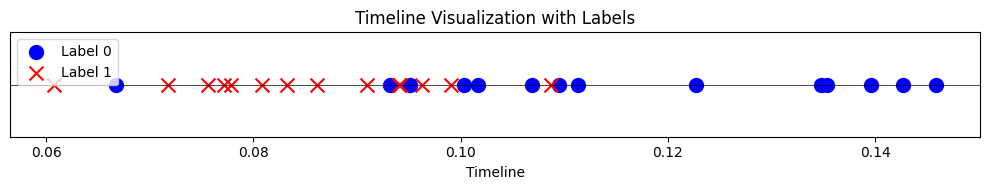

In [56]:
data = train_distances.flatten()
labels = train_y

# Marker styles for labels
marker_styles = {0: 'o', 1: 'x'}
colors = {0: 'blue', 1: 'red'}

# Create the figure and axis
plt.figure(figsize=(10, 2))
plt.axhline(0, color='black', linewidth=0.5)  # Timeline baseline

# Plot points on the timeline
for dist, label in zip(data, labels):
    plt.scatter(dist, 0, marker=marker_styles[label], color=colors[label], s=100, label=f'Label {label}')

# Remove duplicate legend entries
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='upper left')

# Add annotations for each point
# for number in data:
#     plt.text(number, 0.1, str(number), ha='center', va='bottom', fontsize=9)

# Adjust timeline aesthetics
plt.yticks([])  # Remove y-axis ticks
plt.xlabel('Timeline')
plt.title('Timeline Visualization with Labels')
plt.tight_layout()
plt.show()

In [55]:
np.argmin(distances_man)

85

In [44]:
distances[85]

10.93835248102729

In [49]:
distances[88:][79]

11.289543607112282

In [53]:
distances_man[167]

11.289543607112282